In [4]:
#FOR PIECHART

#Employed 2013-2023 (EXTRACT OVERALL AND PERM EMPLOYMENT RATES)
import pandas as pd
df1 = pd.read_csv('DataSet/GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD.csv',na_values=['N.A.','na'])#, skiprows = ['Singapore University of Technology and Design'])

#Extract University, Key values
df1.sort_values(by="university")
df1 = df1[df1['university'].str.contains('National University of Singapore|Nanyang Technological University')]
df1 = df1.drop( ['basic_monthly_mean',
               'gross_monthly_mean',
               'basic_monthly_median',
               'gross_monthly_median',
               'gross_mthly_25_percentile',
               'gross_mthly_75_percentile',
               'school',
              ]
              , axis = 1 )

truthTableA1 = df1.loc[ :, 'year'] >= 2013
truthTableB1 = df1.loc[ :, 'year'] <= 2023 
truthTableC1 = truthTableA1 & truthTableB1

df1_Emp_2013_2023 = df1[truthTableC1]
df1_Emp_2013_2023 = df1_Emp_2013_2023.dropna()

#EXTRACT NUS BUSINESS
truthTableD1 = df1_Emp_2013_2023.loc[ :, 'degree'] == 'Bachelor of Business Administration'
df1_NUS_Business_2013_2023 = df1_Emp_2013_2023[truthTableD1]
df1_NUS_Business_2013_2023 = df1_NUS_Business_2013_2023.reset_index(drop=True)

#EXTRACT NTU BUSINESS
truthTableE1 = df1_Emp_2013_2023.loc[ :, 'degree'] == 'Business (3-yr direct Honours Programme)'
truthTableF1 = df1_Emp_2013_2023.loc[ :, 'degree'] == 'Business'
truthTableG1 = df1_Emp_2013_2023.loc[ :, 'degree'] == 'Bachelor of Business (Hons)'
truthTableH1 = truthTableE1 & truthTableF1 & truthTableG1
df1_NTU_Business_2013_2023  = df1_Emp_2013_2023[truthTableH1]


#df1_Emp_2013_2023.isin({'degree': [50, 30]})
NTU_Business_Only = df1_Emp_2013_2023['degree'].isin(['Business (3-yr direct Honours Programme)', 'Business', 'Bachelor of Business (Hons)' ])
df1_NTU_Business_2013_2023 = df1_Emp_2013_2023[NTU_Business_Only]
df1_NTU_Business_2013_2023 = df1_NTU_Business_2013_2023.reset_index(drop=True)

print(df1_NUS_Business_2013_2023)
print(df1_NTU_Business_2013_2023) 

    year                        university  \
0   2013  National University of Singapore   
1   2014  National University of Singapore   
2   2015  National University of Singapore   
3   2016  National University of Singapore   
4   2017  National University of Singapore   
5   2018  National University of Singapore   
6   2019  National University of Singapore   
7   2020  National University of Singapore   
8   2021  National University of Singapore   
9   2022  National University of Singapore   
10  2023  National University of Singapore   

                                 degree  employment_rate_overall  \
0   Bachelor of Business Administration                     88.7   
1   Bachelor of Business Administration                     87.9   
2   Bachelor of Business Administration                     88.2   
3   Bachelor of Business Administration                     93.6   
4   Bachelor of Business Administration                     94.9   
5   Bachelor of Business Administration

Enter a year from 2013 to 2023: 2019


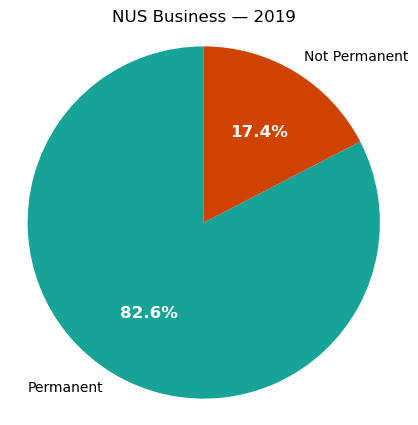

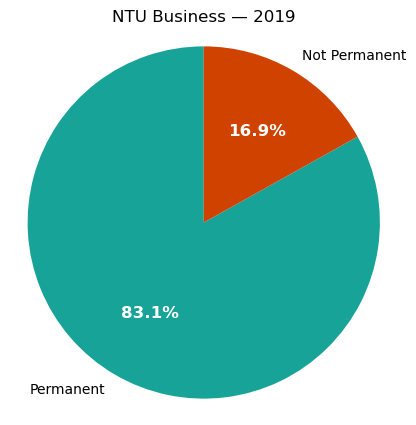

In [6]:
import matplotlib.pyplot as plt #Add Textfield #While #My Own

# 1) Ask for a valid year
def ask_year():
    invalid = True
    while invalid:
        txt = input("Enter a year from 2013 to 2023:").strip()
        
        if txt.isdigit():  
            year = int(txt)
            if year >= 2013 and year <= 2023:
                invalid = False
                return year
            else:
                print("Sorry year must be between 2013 and 2023")
                print("Please try again")
        else:
            print("This is not a valid year")
            print("Please enter a year between 2013 and 2023")

# 2) Draw a pie for ONE university for ONE year
def pie_perm_for_year(df_uni, uni_name, year):
    # keep only rows for the chosen year
    this_year = df_uni[df_uni['year'] == year]

    if this_year.empty:
        print(f"No data for {uni_name} in {year}.")
        return

    # if there are multiple rows in that year, take the mean
    perm = float(this_year['employment_rate_ft_perm'].mean())

    sizes  = [perm, 100 - perm]
    labels = ['Permanent', 'Not Permanent']
    colors = ["#17A398", "#CF4200"]  # teal & orange-red

    fig, ax = plt.subplots(figsize=(5, 5))
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'color': 'black'}   # label color outside
    )

    # make the % numbers on the slices white so they pop
    for t in autotexts:
        t.set_color('white')
        t.set_weight('bold')
        t.set_fontsize(12)

    ax.set_title(f'{uni_name} — {year}')
    ax.axis('equal')
    plt.show()

# ==== Run it ====
yr = ask_year()
if yr is not None:
    pie_perm_for_year(df1_NUS_Business_2013_2023, 'NUS Business', yr)
    pie_perm_for_year(df1_NTU_Business_2013_2023, 'NTU Business', yr)
